# Telco Churn

In this example, we use the Telco Churn dataset to predict which Telco user is likely to churn; that is, customers that will likely stop using Telco. You can download the Jupyter Notebook of the study <a href="churn.ipynb">here</a> and the dataset from <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a>.

<ul class="ul_content">    
    <li>Churn - customers that left within the last month</li>
    <li>Services - services of each customer (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)</li>
    <li>Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Customer demographics - gender, age range, and if they have partners and dependents</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

Let's create the Virtual DataFrame of the dataset.

In [4]:
from verticapy import *

In [5]:
conn_info = {"host": "107.20.23.55", 
             "port": "5433", 
             "database": "testdrive", 
             "password": "password", 
             "user": "dbadmin"}
# Save a new connection
new_auto_connection(conn_info, name = "pranjs_cluster")
# Set the main auto connection
change_auto_connection("pranjs_cluster")

In [6]:
read_auto_connect()

In [ ]:
drop(name = 'public.churn')
read_csv("churn.csv",
        schema = 'public',
        table_name = 'churn',
        genSQL = True)

In [ ]:
read_csv("churn.csv",
        schema = 'public',
        table_name = 'churn')
        #genSQL = True

In [7]:
churn = vDataFrame('public.churn')

In [9]:
%load_ext verticapy.sql

In [ ]:
%%sql
SELECT * From models;

In [ ]:
%%sql
SELECT * From tables;

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInteger,010PartnerBoolean,010DependentsBoolean,123tenureInteger,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
2,0031-PVLZI,Female,0,✅,✅,4,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Mailed check,20.35,76.35,✅
3,0057-QBUQH,Female,0,❌,✅,43,✅,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,✅,Electronic check,25.1,1070.15,❌
4,0137-OCGAB,Female,0,❌,❌,1,✅,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,✅,Mailed check,80.2,80.2,✅
5,0139-IVFJG,Female,0,✅,❌,2,✅,No,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,90.35,190.5,❌
6,0178-SZBHO,Male,0,✅,✅,47,✅,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,❌,Electronic check,87.2,4017.45,❌
7,0208-BPQEJ,Female,0,✅,✅,12,✅,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,❌,Bank transfer (automatic),19.4,198.1,❌
8,0219-YTZUE,Male,0,✅,✅,4,✅,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,✅,Bank transfer (automatic),84.8,371.9,✅
9,0220-EBGCE,Male,0,❌,❌,2,✅,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,✅,Electronic check,85.85,167.3,✅
10,0229-LFJAF,Male,0,❌,❌,72,✅,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,❌,Bank transfer (automatic),69.65,4908.25,❌

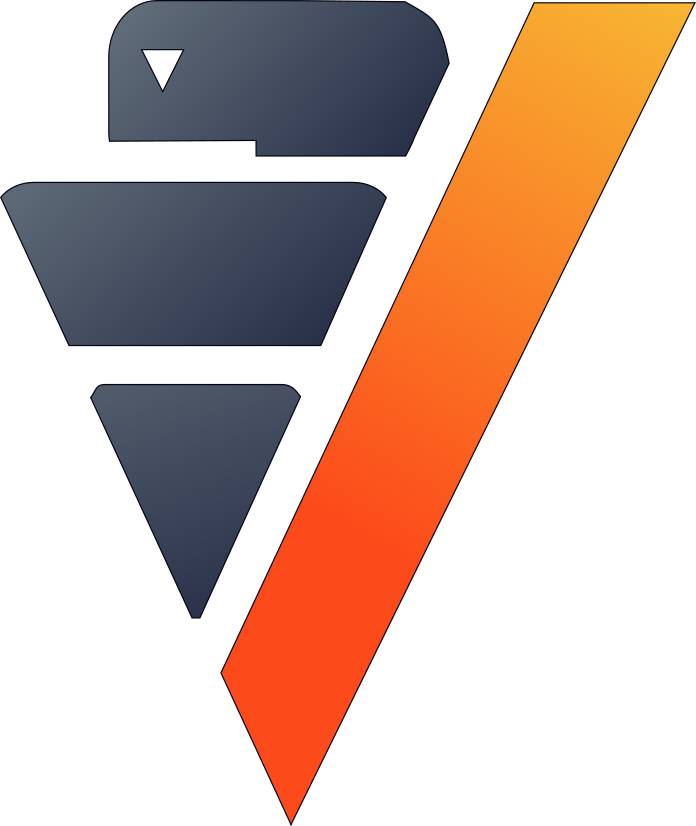

In [10]:
%%sql
SELECT * From churn;

## Data Exploration and Preparation

Let's examine our data.

,AbcgenderVarchar(20),AbcContractVarchar(28),123ChurnFloat
1,Female,Month-to-month,0.437402597402597
2,Male,Two year,0.0305882352941176
3,Male,Month-to-month,0.416923076923077
4,Female,Two year,0.0260355029585799
5,Female,One year,0.104456824512535
6,Male,One year,0.120529801324503

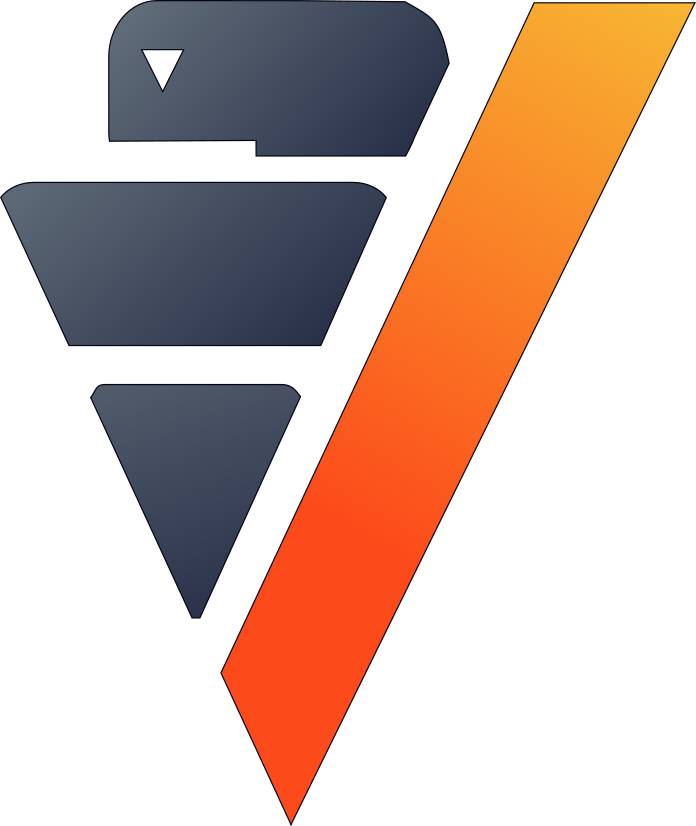

In [11]:
churn.groupby(["gender",
             "Contract"],
            ["AVG(DECODE(Churn, 'Yes', 1, 0)) AS Churn"])

In [ ]:
set_option("sql_on", True)

In [ ]:
set_option("sql_on", False)

In [ ]:
churn

  0%|          | 0/2 [00:00<?, ?it/s]

,dtype,count,top,top_percent
"""customerID""",varchar(20),7043,0002-ORFBO,0.014
"""gender""",varchar(20),7043,Male,50.476
"""SeniorCitizen""",int,7043,0,83.785
"""Partner""",boolean,7043,❌,51.697
"""Dependents""",boolean,7043,❌,70.041
"""tenure""",int,7043,1,8.704
"""PhoneService""",boolean,7043,✅,90.317
"""MultipleLines""",varchar(100),7043,No,48.133
"""InternetService""",varchar(22),7043,Fiber optic,43.959
"""OnlineSecurity""",varchar(38),7043,No,49.666

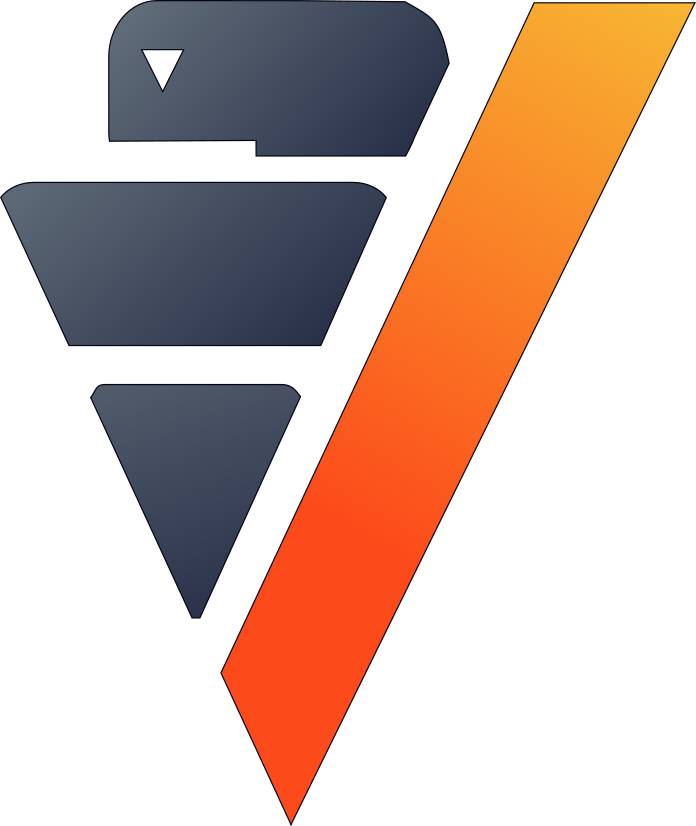

In [12]:
churn.describe(method = "categorical")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

In [13]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes",1,0)

,AbccustomerIDVarchar(20),123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool
1,0014-BMAQU,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
2,0031-PVLZI,0,1,1,4,1,0,0,0,0,0,0,0,0,20.35,76.35,1,1,0,0,1,0,,,0
3,0057-QBUQH,0,0,1,43,1,1,0,0,0,0,0,0,1,25.1,1070.15,0,1,0,0,0,0,,,1
4,0137-OCGAB,0,0,0,1,1,1,0,1,0,0,0,0,1,80.2,80.2,1,1,0,1,1,0,,,0
5,0139-IVFJG,0,1,0,2,1,0,1,1,0,0,1,0,0,90.35,190.5,0,1,0,1,1,0,,,1
6,0178-SZBHO,0,1,1,47,1,1,0,1,0,0,1,0,0,87.2,4017.45,0,0,0,1,1,0,,,1
7,0208-BPQEJ,0,1,1,12,1,0,0,0,0,0,0,0,0,19.4,198.1,0,1,0,0,1,0,,,0
8,0219-YTZUE,0,1,1,4,1,1,0,1,1,0,0,0,1,84.8,371.9,1,0,0,1,1,0,,,0
9,0220-EBGCE,0,0,0,2,1,0,0,0,1,0,0,1,1,85.85,167.3,1,0,0,1,1,0,,,1
10,0229-LFJAF,0,0,0,72,1,1,1,1,1,1,0,0,0,69.65,4908.25,0,0,1,0,0,0,,,0

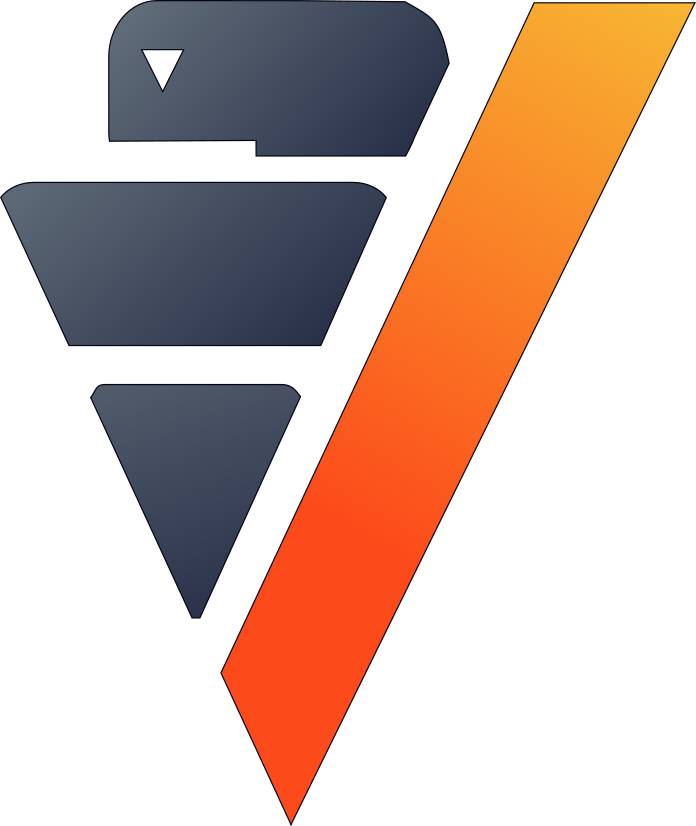

In [14]:
churn.get_dummies().drop(["gender", 
                          "Contract", 
                          "PaymentMethod", 
                          "InternetService"])

In [ ]:
churn

Let's compute the correlations between the different variables and the response column. Finding these relationships is one of the main purposes of data science, and understanding these correlations can help us make better decisions.

,"""Churn"""
,1.0
,0.405
,-0.352
,0.308
,0.302
,-0.199
,0.193
,0.192
,-0.178
,-0.171

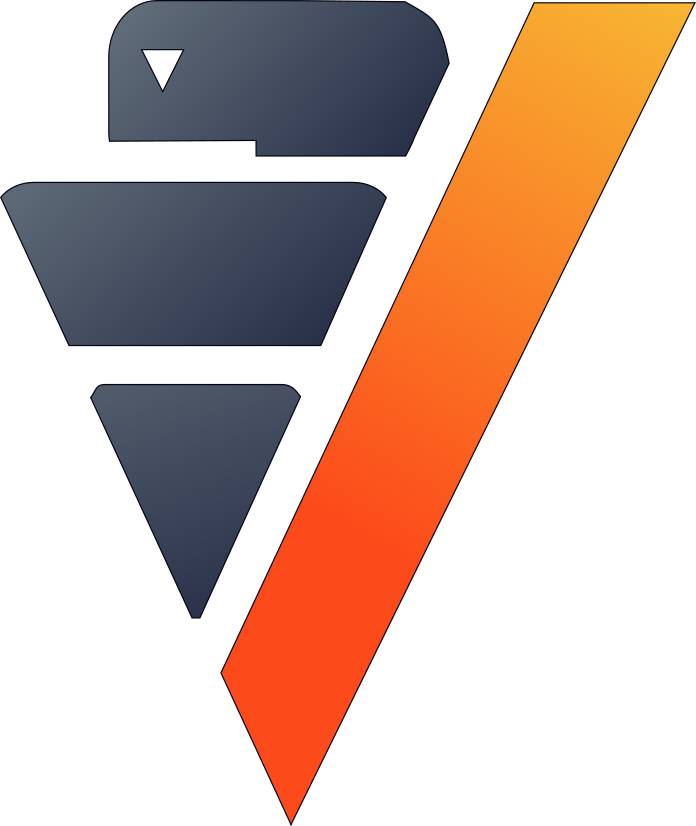

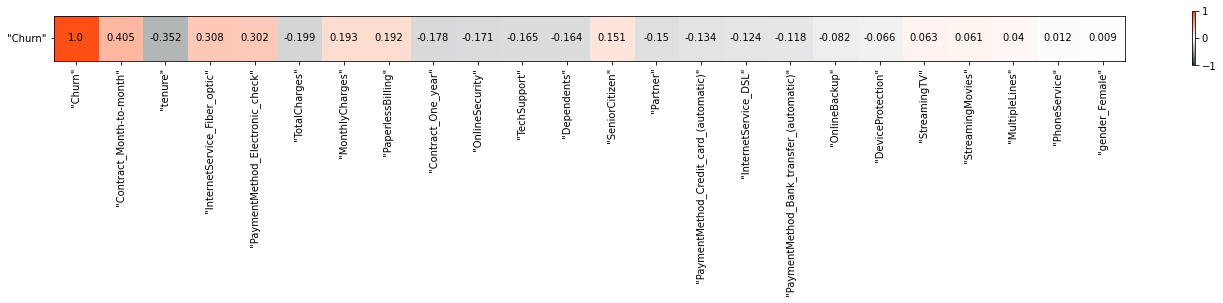

In [15]:
%matplotlib inline
churn.corr(focus = 'Churn')

In [ ]:
churn.corr(method = 'pearson')

Many features have a strong correlation with the 'Churn' variable. For example, the customers that have a 'Month to Month' contract are more likely to churn. Having this type of contract gives customers a lot of flexibility and allows them to leave at any time. New customers are also likely to churn.

<AxesSubplot:xlabel='"Contract_Month-to-month"', ylabel='avg("Churn")'>

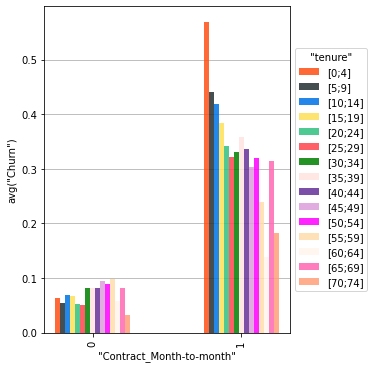

In [16]:
# No lock-in = Churn
churn.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

The following scatter plot shows that providing better plans can prevent churning. Indeed, customers having high total charges are more likely to churn even if they've been with the company for a long time.

This pulls data from the database, we're not limited by memory, Python wouldn't be able plot TBs, but VerticaPy can.

<AxesSubplot:xlabel='"TotalCharges"', ylabel='"tenure"'>

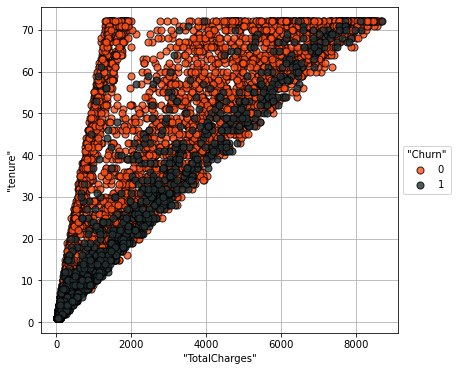

In [17]:
churn.scatter(["TotalCharges", "tenure"], catcol = "Churn")

Let's move on to machine learning.

## Machine Learning

Logistic regression is a very powerful algorithm that can detect churns. Let's use a cross validation to evaluate our model.

  0%|          | 0/3 [00:00<?, ?it/s]

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,0.8453050155339185,0.6490042086561829,0.7713675213675214,0.177581061580989,0.5445205479452054,0.7781402936378466,0.6406984553391537,0.497076872421069,0.5471038141937239,0.45162437308181747,0.47134387351778656,8.751970767974854
2-fold,0.8386484391249295,0.6399587300906127,0.7209897610921502,0.182875352354841,0.4793233082706767,0.8360655737704918,0.6093189964157706,0.45524525493193985,0.5165730708869853,0.4011983082706767,0.4381443298969072,9.966323852539062
3-fold,0.8412702313693347,0.64864595032126,0.7633262260127932,0.186259598873298,0.5392895586652314,0.7977707006369427,0.6435452793834296,0.4965935791685481,0.548498714614811,0.44960029312850835,0.4744318181818182,8.699404954910278
avg,0.8417412286760608,0.6458696296893519,0.7518945028241549,0.182238670936376,0.5210444716270378,0.8039921893484271,0.6311875770461179,0.48297190217385233,0.5373918665651735,0.4341409914936675,0.461306673865504,9.139233191808065
std,0.0033531897082307556,0.005122122392955577,0.02706460610995346,0.004374159897050342,0.03622612891364367,0.029459543631083305,0.018992161958931133,0.024013196758242598,0.0180430908359348,0.02854714536275189,0.02011851098246895,0.7167635676965687

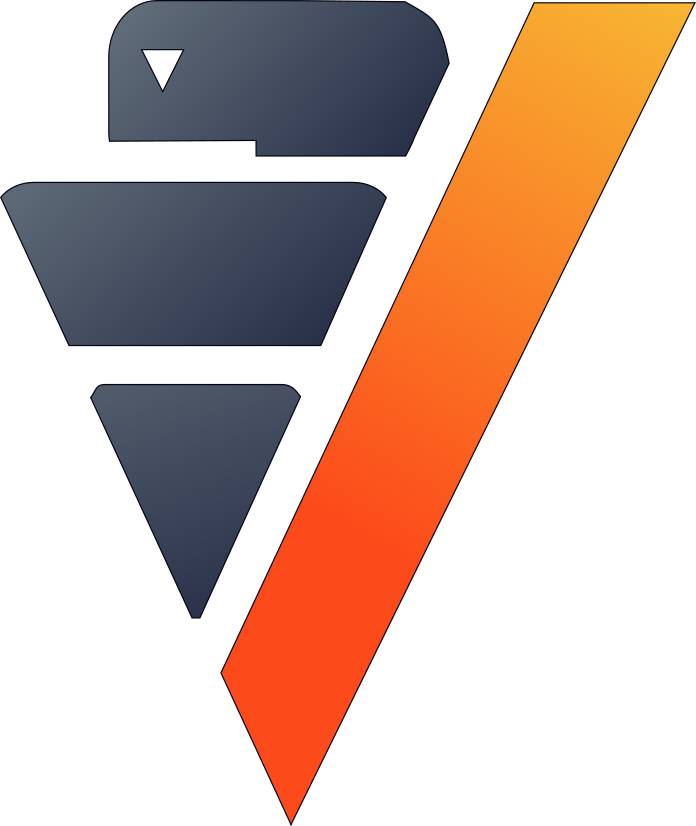

In [18]:
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")

from verticapy.learn.model_selection import cross_validate
cross_validate(model, churn, churn.get_columns(exclude_columns = ["churn", "customerID"]), 'churn')
#results

The model is excellent! Let's run some machine learning on the entire dataset and compute the importance of each feature.


,importance,sign
,28.58,-1
,18.43,1
,8.66,1
,7.0,1
,5.79,1
,5.26,-1
,4.31,1
,3.58,1
,2.93,-1
,2.81,-1

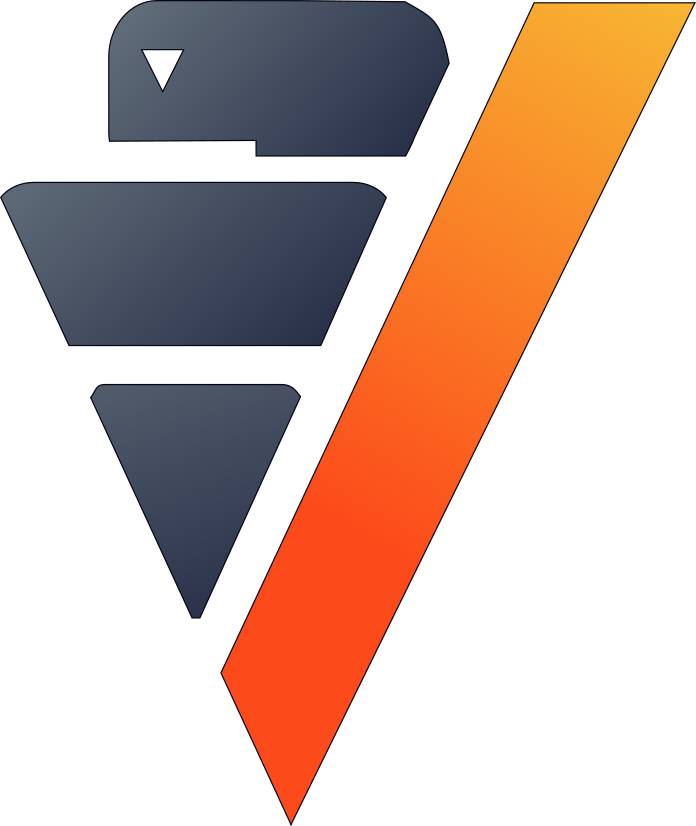

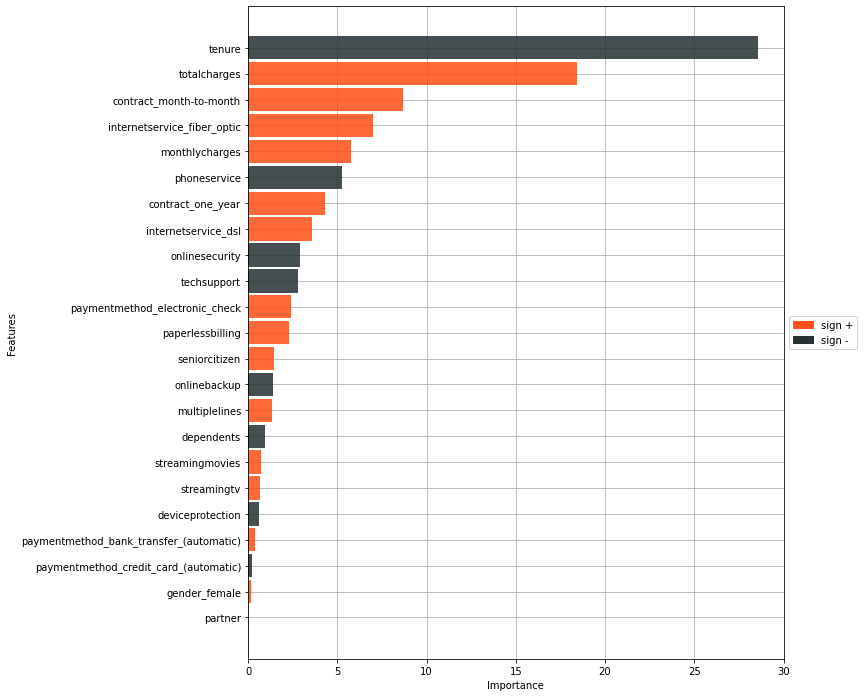

In [19]:
model.fit(churn, 
          churn.get_columns(exclude_columns = ["churn", "customerID"]), 
          'churn')
model.features_importance()
# We can use all the variables without limiting performance

In [ ]:
model.roc_curve()

,AbccustomerIDVarchar(20),123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123pred_probs2Integer
1,0014-BMAQU,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,0
2,0031-PVLZI,0,1,1,4,1,0,0,0,0,0,0,0,0,20.35,76.35,1,1,0,0,1,0,,,0,0
3,0057-QBUQH,0,0,1,43,1,1,0,0,0,0,0,0,1,25.1,1070.15,0,1,0,0,0,0,,,1,0
4,0137-OCGAB,0,0,0,1,1,1,0,1,0,0,0,0,1,80.2,80.2,1,1,0,1,1,0,,,0,1
5,0139-IVFJG,0,1,0,2,1,0,1,1,0,0,1,0,0,90.35,190.5,0,1,0,1,1,0,,,1,1
6,0178-SZBHO,0,1,1,47,1,1,0,1,0,0,1,0,0,87.2,4017.45,0,0,0,1,1,0,,,1,0
7,0208-BPQEJ,0,1,1,12,1,0,0,0,0,0,0,0,0,19.4,198.1,0,1,0,0,1,0,,,0,0
8,0219-YTZUE,0,1,1,4,1,1,0,1,1,0,0,0,1,84.8,371.9,1,0,0,1,1,0,,,0,1
9,0220-EBGCE,0,0,0,2,1,0,0,0,1,0,0,1,1,85.85,167.3,1,0,0,1,1,0,,,1,1
10,0229-LFJAF,0,0,0,72,1,1,1,1,1,1,0,0,0,69.65,4908.25,0,0,1,0,0,0,,,0,0

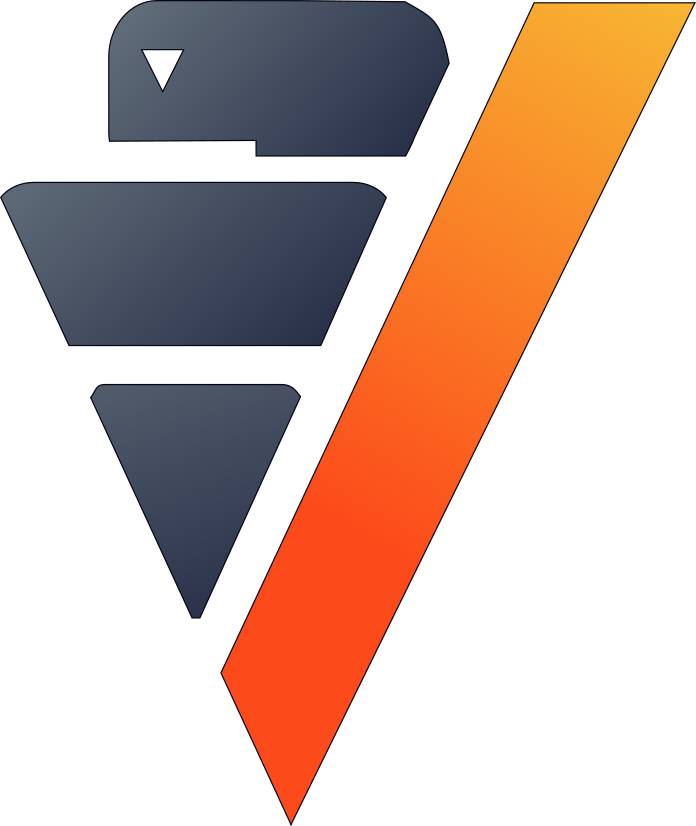

In [20]:
model.predict(churn,
              X = churn.get_columns(exclude_columns = ["churn", "customerID"]),
              name = 'pred_probs2')

,AbccustomerIDVarchar(20),123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123pred_probs2Integer
1,2612-RANWT,0,0,0,12,1,1,0,0,1,0,1,1,1,100.15,1164.3,1,1,0,1,1,0,,,0,1
2,2249-YPRNG,0,1,1,20,1,1,0,1,1,0,1,1,1,105.85,2239.65,1,1,0,1,1,0,,,0,1
3,3550-SAHFP,0,0,0,33,1,1,0,0,0,0,0,1,1,83.35,2757.85,1,1,0,1,1,0,,,1,1
4,3223-WZWJM,0,0,0,26,1,1,0,0,0,0,0,1,1,83.95,2254.2,1,0,0,1,1,0,,,1,1
5,3797-FKOGQ,0,0,1,11,1,1,0,0,0,0,0,1,0,86.2,893.2,0,0,0,1,1,0,,,1,1
6,2696-NARTR,0,0,0,11,1,0,0,0,0,1,0,0,1,73.85,926.25,1,0,0,1,1,0,,,1,1
7,2254-DLXRI,0,0,0,1,1,1,0,1,0,0,0,0,1,79.15,79.15,0,1,0,1,1,0,,,0,1
8,4482-EWFMI,0,0,0,2,1,0,0,0,0,0,0,0,1,69.7,135.2,0,1,0,1,1,0,,,1,1
9,4128-ETESU,1,1,0,47,1,1,0,0,1,0,1,1,0,99.7,4747.2,0,1,0,1,1,0,,,1,1
10,4729-XKASR,0,0,1,1,0,0,0,0,0,0,0,0,0,24.75,24.75,1,0,1,0,1,0,,,1,1

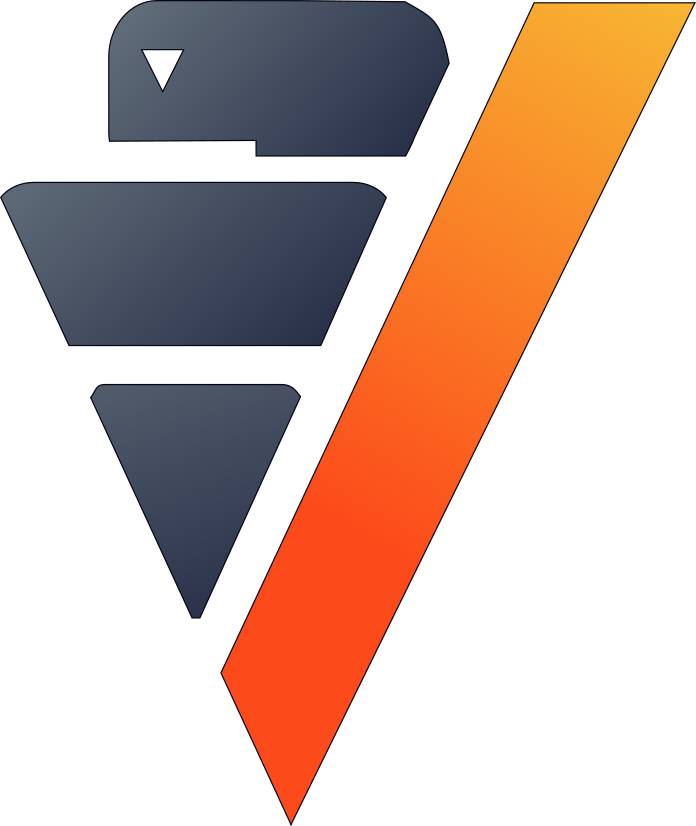

In [21]:
churn.sort({"pred_probs2":"desc"})

Based on our model, most churning customers are at least one of the following:
<ul>
 <li>Paying higher bills</li>
 <li>New to Telco customers</li>
 <li>Have a monthly contract</li>
</ul>

Notice that customers have a 'Fiber Optic' option are also likely to churn. Let's check if this relationship is causal by computing some aggregations.

In [25]:
set_option("sql_on", False)

,123InternetService_Fiber_opticInteger,123tenureFloat,123totalchargesFloat,123contract_month_to_monthFloat,123monthlychargesFloat
1,0,31.9422346085635,1558.06548526423,0.442614644033443,43.7882442361287
2,1,32.9179586563307,3205.30457041344,0.68733850129199,91.5001291989664

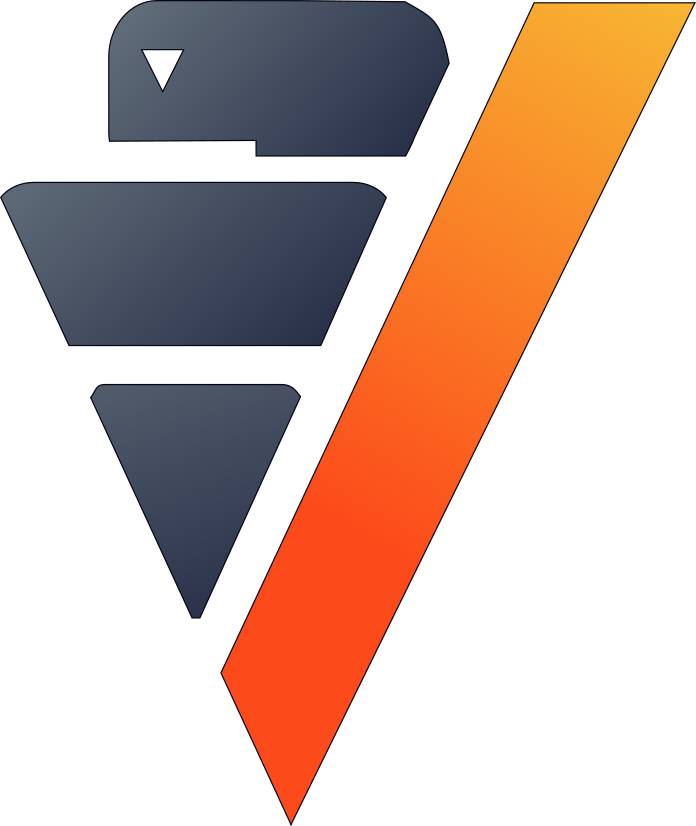

In [26]:
# Is Fiber optic a Bad Option? - VerticaPy
import verticapy.stats as st
churn.groupby(["InternetService_Fiber_optic"], 
              [st.avg(churn["tenure"])._as("tenure"),
               st.avg(churn["totalcharges"])._as("totalcharges"),
               st.avg(churn["contract_month-to-month"])._as("contract_month_to_month"),
               st.avg(churn["monthlycharges"])._as("monthlycharges")])

It seems like the 'Fiber Optic' option in and of itself doesn't lead to churning, but customers that have this option tend to churn because their contract puts them into one of the three categories we listed before: they're paying more.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!